In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import cv2
import gc
import os
from glob import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import layers
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '../content/drive/MyDrive/datasets_ict'
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(image_path)
print(train_set)

{'Malignant cases': 561, 'Normal cases': 416, 'Bengin cases': 120}


In [ ]:
path = '../content/drive/MyDrive/datasets_ict'
classes = os.listdir(path)
classes

['Malignant cases', 'Normal cases', 'Bengin cases']

In [ ]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

In [ ]:
X = []
Y = []
 
for i, cat in enumerate(classes):
  print(i,cat)
  images = glob(f'{path}/{cat}/*.jpg')
 
  for image in images:
    img = cv2.imread(image)
     
    X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
    Y.append(i)
 
X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values
len(X)


0 Malignant cases
1 Normal cases
2 Bengin cases


1097

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, one_hot_encoded_Y,
                                                  test_size = SPLIT,
                                                  random_state = 10)
print(X_train.shape)
print(X_test.shape)
y_test[0]

(877, 256, 256, 3)
(220, 256, 256, 3)


array([1, 0, 0], dtype=uint8)

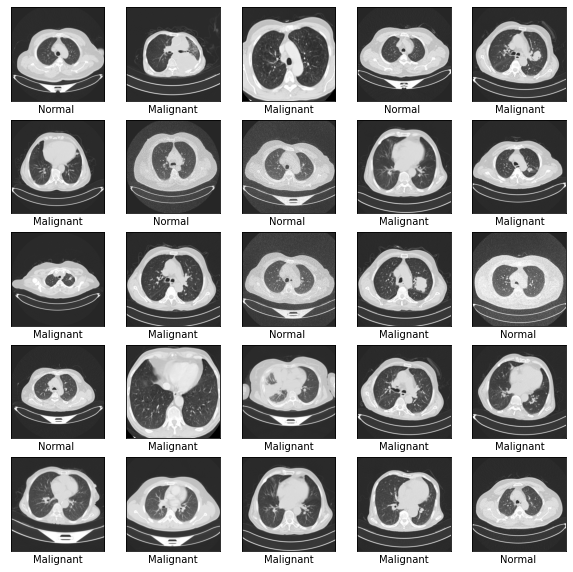

In [ ]:
class_names = ['Normal ','Malignant','Bengin']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
X_train, X_test =X_train / 255.0, X_test / 255.0
X_train.shape


(877, 256, 256, 3)

**CNN**


In [ ]:
#1)CNN MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
28/28 [==============================] - 13s 126ms/step - loss: 1.6485 - accuracy: 0.6271 - val_loss: 0.4811 - val_accuracy: 0.7909
Epoch 2/10
28/28 [==============================] - 2s 89ms/step - loss: 0.2299 - accuracy: 0.9168 - val_loss: 0.0979 - val_accuracy: 0.9591
Epoch 3/10
28/28 [==============================] - 2s 88ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0661 - val_accuracy: 0.9864
Epoch 4/10
28/28 [==============================] - 2s 89ms/step - loss: 0.0299 - accuracy: 0.9920 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 5/10
28/28 [==============================] - 2s 88ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0353 - val_accuracy: 0.9909
Epoch 6/10
28/28 [==============================] - 2s 88ms/step - loss: 0.0107 - accuracy: 0.9954 - val_loss: 0.0141 - val_accuracy: 0.9955
Epoch 7/10
28/28 [==============================] - 2s 89ms/step - loss: 0.0082 - accuracy: 0.9966 - val_loss: 0.0126 - val_accuracy: 0.9909
Epoch 8/10


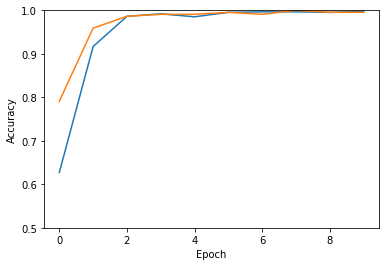

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)
plt.show()

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=2)

7/7 - 0s - loss: 0.0083 - accuracy: 0.9955 - 270ms/epoch - 39ms/step


In [ ]:

Y_pred = model.predict(X_test)
Y_val = np.argmax(y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

7/7 [==============================] - 0s 34ms/step


In [ ]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[105,   0,   0],
       [  0,  86,   1],
       [  0,   0,  28]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred,
                                    target_names=classes))

                 precision    recall  f1-score   support

Malignant cases       1.00      1.00      1.00       105
   Normal cases       1.00      0.99      0.99        87
   Bengin cases       0.97      1.00      0.98        28

       accuracy                           1.00       220
      macro avg       0.99      1.00      0.99       220
   weighted avg       1.00      1.00      1.00       220



**INCEPTION V3**

In [ ]:
#inceptionv3

from tensorflow.keras.applications.inception_v3 import InceptionV3
 
pre_trained_model = InceptionV3(
    input_shape = (IMG_SIZE, IMG_SIZE, 3),
    weights = 'imagenet',
    include_top = False
)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:

len(pre_trained_model.layers)

311

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [ ]:
x = layers.Flatten()(last_output)
 
x = layers.Dense(256,activation='relu')(x)
x = layers.BatchNormalization()(x)
 
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
 
output = layers.Dense(3, activation='softmax')(x)
 
model = keras.Model(pre_trained_model.input, output)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1)

Epoch 1/10
14/14 [==============================] - 13s 588ms/step - loss: 0.5122 - accuracy: 0.8096 - val_loss: 0.4279 - val_accuracy: 0.8955
Epoch 2/10
14/14 [==============================] - 3s 206ms/step - loss: 0.1286 - accuracy: 0.9681 - val_loss: 0.3604 - val_accuracy: 0.9045
Epoch 3/10
14/14 [==============================] - 3s 203ms/step - loss: 0.0610 - accuracy: 0.9897 - val_loss: 0.1902 - val_accuracy: 0.9273
Epoch 4/10
14/14 [==============================] - 3s 222ms/step - loss: 0.0363 - accuracy: 0.9966 - val_loss: 0.1388 - val_accuracy: 0.9545
Epoch 5/10
14/14 [==============================] - 3s 198ms/step - loss: 0.0211 - accuracy: 0.9966 - val_loss: 0.1366 - val_accuracy: 0.9455
Epoch 6/10
14/14 [==============================] - 3s 194ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.1194 - val_accuracy: 0.9591
Epoch 7/10
14/14 [==============================] - 3s 190ms/step - loss: 0.0175 - accuracy: 0.9977 - val_loss: 0.0960 - val_accuracy: 0.9636
Epoch

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                             

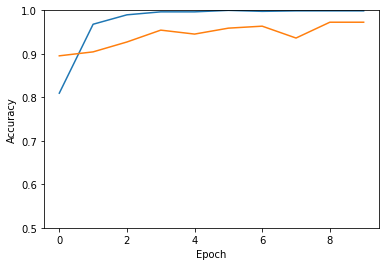

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)
plt.show()

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=2)

7/7 - 1s - loss: 0.0450 - accuracy: 0.9727 - 1s/epoch - 195ms/step


In [ ]:

Y_pred = model.predict(X_test)
Y_val = np.argmax(y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

7/7 [==============================] - 1s 84ms/step


In [ ]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[105,   0,   0],
       [  0,  87,   0],
       [  1,   5,  22]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred,
                                    target_names=classes))

                 precision    recall  f1-score   support

Malignant cases       0.99      1.00      1.00       105
   Normal cases       0.95      1.00      0.97        87
   Bengin cases       1.00      0.79      0.88        28

       accuracy                           0.97       220
      macro avg       0.98      0.93      0.95       220
   weighted avg       0.97      0.97      0.97       220



# RESNET

In [ ]:
#resnet
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# Resize the images
X_train = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_test = np.array([cv2.resize(img, (224, 224)) for img in X_test])

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [ ]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1)


              

Epoch 1/10
14/14 [==============================] - 10s 418ms/step - loss: 6.5375 - accuracy: 0.4675 - val_loss: 1.1776 - val_accuracy: 0.6318
Epoch 2/10
14/14 [==============================] - 3s 229ms/step - loss: 0.9070 - accuracy: 0.6431 - val_loss: 0.8979 - val_accuracy: 0.6682
Epoch 3/10
14/14 [==============================] - 3s 229ms/step - loss: 0.6913 - accuracy: 0.7172 - val_loss: 0.6081 - val_accuracy: 0.7909
Epoch 4/10
14/14 [==============================] - 3s 229ms/step - loss: 0.6656 - accuracy: 0.7263 - val_loss: 0.7902 - val_accuracy: 0.6000
Epoch 5/10
14/14 [==============================] - 3s 230ms/step - loss: 0.6155 - accuracy: 0.7275 - val_loss: 0.9806 - val_accuracy: 0.5955
Epoch 6/10
14/14 [==============================] - 3s 230ms/step - loss: 0.5380 - accuracy: 0.7537 - val_loss: 0.5372 - val_accuracy: 0.8136
Epoch 7/10
14/14 [==============================] - 3s 229ms/step - loss: 0.4603 - accuracy: 0.8255 - val_loss: 0.4344 - val_accuracy: 0.8273
Epoch

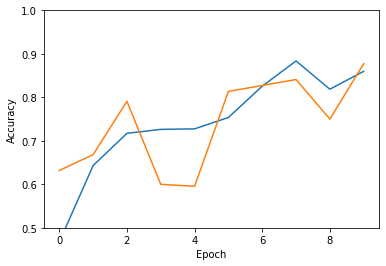

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


7/7 - 1s - loss: 0.3231 - accuracy: 0.8773 - 1s/epoch - 194ms/step
Test loss: 0.323132187128067
Test accuracy: 0.8772727251052856


In [ ]:
#confusion matrix that compares the true labels (Y_val) with the predicted labels (Y_pred).
metrics.confusion_matrix(Y_val, Y_pred)


array([[105,   0,   0],
       [  0,  87,   0],
       [  1,   5,  22]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred, target_names=classes))
#generate a classification report that gives several evaluation metrics for the model's performance on the test set. 
#The evaluation metrics include precision, recall, f1-score, and support

                 precision    recall  f1-score   support

Malignant cases       0.99      1.00      1.00       105
   Normal cases       0.95      1.00      0.97        87
   Bengin cases       1.00      0.79      0.88        28

       accuracy                           0.97       220
      macro avg       0.98      0.93      0.95       220
   weighted avg       0.97      0.97      0.97       220



# VGG **NET16**



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
# Define VGG16 model with pre-trained weights
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Freeze all layers
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# Add new layers
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
# Create new model
model = Model(inputs=vgg.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Resize the images
X_train = np.array([cv2.resize(img, (256, 256)) for img in X_train])
X_test = np.array([cv2.resize(img, (256, 256)) for img in X_test])

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1)

Epoch 1/10
14/14 [==============================] - 22s 1s/step - loss: 2.9308 - accuracy: 0.4869 - val_loss: 0.8842 - val_accuracy: 0.5636
Epoch 2/10
14/14 [==============================] - 6s 469ms/step - loss: 0.7598 - accuracy: 0.6522 - val_loss: 0.6384 - val_accuracy: 0.7182
Epoch 3/10
14/14 [==============================] - 6s 470ms/step - loss: 0.3506 - accuracy: 0.8689 - val_loss: 0.2965 - val_accuracy: 0.9136
Epoch 4/10
14/14 [==============================] - 6s 470ms/step - loss: 0.2166 - accuracy: 0.9396 - val_loss: 0.2320 - val_accuracy: 0.9364
Epoch 5/10
14/14 [==============================] - 7s 473ms/step - loss: 0.1313 - accuracy: 0.9783 - val_loss: 0.1589 - val_accuracy: 0.9500
Epoch 6/10
14/14 [==============================] - 7s 475ms/step - loss: 0.0945 - accuracy: 0.9840 - val_loss: 0.1258 - val_accuracy: 0.9773
Epoch 7/10
14/14 [==============================] - 7s 475ms/step - loss: 0.0687 - accuracy: 0.9932 - val_loss: 0.1009 - val_accuracy: 0.9818
Epoch 8/

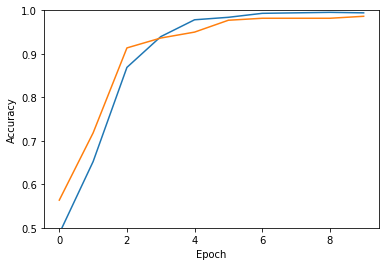

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


7/7 - 5s - loss: 0.0650 - accuracy: 0.9864 - 5s/epoch - 712ms/step
Test loss: 0.06500229239463806
Test accuracy: 0.9863636493682861


In [ ]:
#predict function to make predictions on the X_test data.
Y_pred = model.predict(X_test)
Y_val = np.argmax(y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)


7/7 [==============================] - 1s 185ms/step


In [ ]:
#confusion matrix that compares the true labels (Y_val) with the predicted labels (Y_pred).
metrics.confusion_matrix(Y_val, Y_pred)


array([[105,   0,   0],
       [  1,  85,   1],
       [  1,   0,  27]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred, target_names=classes))
#generate a classification report that gives several evaluation metrics for the model's performance on the test set. 
#The evaluation metrics include precision, recall, f1-score, and support

                 precision    recall  f1-score   support

Malignant cases       0.98      1.00      0.99       105
   Normal cases       1.00      0.98      0.99        87
   Bengin cases       0.96      0.96      0.96        28

       accuracy                           0.99       220
      macro avg       0.98      0.98      0.98       220
   weighted avg       0.99      0.99      0.99       220



In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

**VGGNET19**

In [ ]:
#vgg19

from tensorflow.keras.applications.vgg19 import VGG19

pre_trained_model = VGG19(
    input_shape = (IMG_SIZE, IMG_SIZE, 3),
    weights = 'imagenet',
    include_top = False
)


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
len(pre_trained_model.layers)
# return the number of layers in the pre-trained model

22

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False
#all the layers in the VGG19 pre-trained model to not be trainable

In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 8, 8, 512)


In [ ]:
x = layers.Flatten()(last_output)

x = layers.Dense(512,activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(3, activation='softmax')(x)

model = keras.Model(pre_trained_model.input, output)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

pre_trained_model = VGG19(
    input_shape = (IMG_SIZE, IMG_SIZE, 3),
    weights = 'imagenet',
    include_top = False
)

# Your model architecture and compilation code here

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1)


Epoch 1/10
14/14 [==============================] - 9s 574ms/step - loss: 0.6213 - accuracy: 0.7731 - val_loss: 5.7490 - val_accuracy: 0.5136
Epoch 2/10
14/14 [==============================] - 8s 544ms/step - loss: 0.1434 - accuracy: 0.9464 - val_loss: 7.3322 - val_accuracy: 0.4909
Epoch 3/10
14/14 [==============================] - 8s 547ms/step - loss: 0.0734 - accuracy: 0.9818 - val_loss: 4.4648 - val_accuracy: 0.5364
Epoch 4/10
14/14 [==============================] - 8s 553ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 2.7828 - val_accuracy: 0.6182
Epoch 5/10
14/14 [==============================] - 8s 556ms/step - loss: 0.0397 - accuracy: 0.9920 - val_loss: 1.5943 - val_accuracy: 0.7045
Epoch 6/10
14/14 [==============================] - 8s 560ms/step - loss: 0.0250 - accuracy: 0.9897 - val_loss: 1.0933 - val_accuracy: 0.7864
Epoch 7/10
14/14 [==============================] - 8s 583ms/step - loss: 0.0193 - accuracy: 0.9920 - val_loss: 0.9092 - val_accuracy: 0.7773
Epoch 

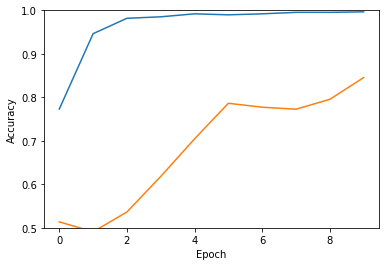

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

7/7 - 2s - loss: 0.4614 - accuracy: 0.8455 - 2s/epoch - 223ms/step
Test loss: 0.4613908529281616
Test accuracy: 0.8454545736312866


In [ ]:
#predict function to make predictions on the X_test data.
Y_pred = model.predict(X_test)
Y_val = np.argmax(y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)


7/7 [==============================] - 2s 223ms/step


In [ ]:
#confusion matrix that compares the true labels (Y_val) with the predicted labels (Y_pred).
metrics.confusion_matrix(Y_val, Y_pred)

array([[105,   0,   0],
       [ 18,  69,   0],
       [ 15,   1,  12]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred, target_names=classes))
#generate a classification report that gives several evaluation metrics for the model's performance on the test set. 
#The evaluation metrics include precision, recall, f1-score, and support

                 precision    recall  f1-score   support

Malignant cases       0.76      1.00      0.86       105
   Normal cases       0.99      0.79      0.88        87
   Bengin cases       1.00      0.43      0.60        28

       accuracy                           0.85       220
      macro avg       0.92      0.74      0.78       220
   weighted avg       0.88      0.85      0.84       220



In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

NEW NEURAL NETWORK

In [ ]:
import numpy as np
# Resize the images
X_train = np.array([cv2.resize(img, (256, 256)) for img in X_train])
X_test = np.array([cv2.resize(img, (256, 256)) for img in X_test])

In [ ]:
#NEW CNN MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/10
14/14 [==============================] - 6s 275ms/step - loss: 1.0339 - accuracy: 0.5017 - val_loss: 0.9561 - val_accuracy: 0.5727
Epoch 2/10
14/14 [==============================] - 2s 156ms/step - loss: 0.8927 - accuracy: 0.5667 - val_loss: 0.9080 - val_accuracy: 0.5636
Epoch 3/10
14/14 [==============================] - 2s 156ms/step - loss: 0.8210 - accuracy: 0.6294 - val_loss: 0.8076 - val_accuracy: 0.6500
Epoch 4/10
14/14 [==============================] - 2s 156ms/step - loss: 0.7072 - accuracy: 0.7047 - val_loss: 0.6927 - val_accuracy: 0.7000
Epoch 5/10
14/14 [==============================] - 2s 157ms/step - loss: 0.5864 - accuracy: 0.7480 - val_loss: 0.6657 - val_accuracy: 0.7864
Epoch 6/10
14/14 [==============================] - 2s 156ms/step - loss: 0.4122 - accuracy: 0.8335 - val_loss: 0.3232 - val_accuracy: 0.8818
Epoch 7/10
14/14 [==============================] - 2s 156ms/step - loss: 0.2433 - accuracy: 0.9133 - val_loss: 0.2985 - val_accuracy: 0.8909
Epoch 

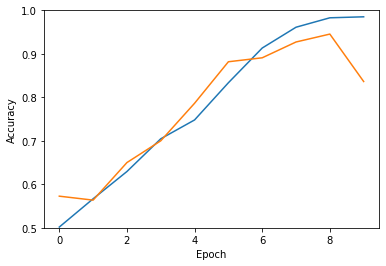

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

7/7 - 0s - loss: 0.4530 - accuracy: 0.8364 - 402ms/epoch - 57ms/step
Test loss: 0.45304200053215027
Test accuracy: 0.8363636136054993


In [ ]:
#predict function to make predictions on the X_test data.
Y_pred = model.predict(X_test)
Y_val = np.argmax(y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

7/7 [==============================] - 0s 37ms/step


In [ ]:
#confusion matrix that compares the true labels (Y_val) with the predicted labels (Y_pred).
metrics.confusion_matrix(Y_val, Y_pred)

array([[105,   0,   0],
       [  6,  51,  30],
       [  0,   0,  28]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred, target_names=classes))
#generate a classification report that gives several evaluation metrics for the model's performance on the test set. 
#The evaluation metrics include precision, recall, f1-score, and support

                 precision    recall  f1-score   support

Malignant cases       0.95      1.00      0.97       105
   Normal cases       1.00      0.59      0.74        87
   Bengin cases       0.48      1.00      0.65        28

       accuracy                           0.84       220
      macro avg       0.81      0.86      0.79       220
   weighted avg       0.91      0.84      0.84       220



Text(0, 0.5, 'testaccuracy')

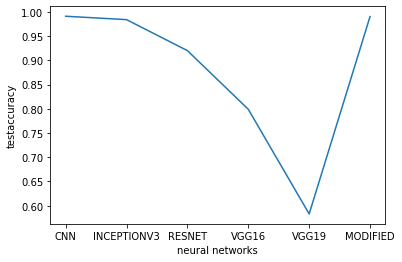

In [ ]:
test_accuracy=[0.9910,0.984,0.92,0.7990,0.583,0.9903]
model=["CNN","INCEPTIONV3","RESNET","VGG16","VGG19","MODIFIED"]
plt.plot(model,test_accuracy)
plt.xlabel("neural networks")
plt.ylabel("testaccuracy")